In [570]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

# First we will look at the data


In [571]:
df = pd.read_csv("Axisinsurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


no missing data

In [573]:
data=df.copy()

In [574]:
df.shape

(1338, 7)

change objects to catagories

In [575]:
data["sex"]=data["sex"].astype("category")
data["smoker"]=data["smoker"].astype("category")
data["region"]=data["region"].astype("category")


In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [577]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [578]:
data.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [579]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

still no missing data

# Exploritory Data Analysis

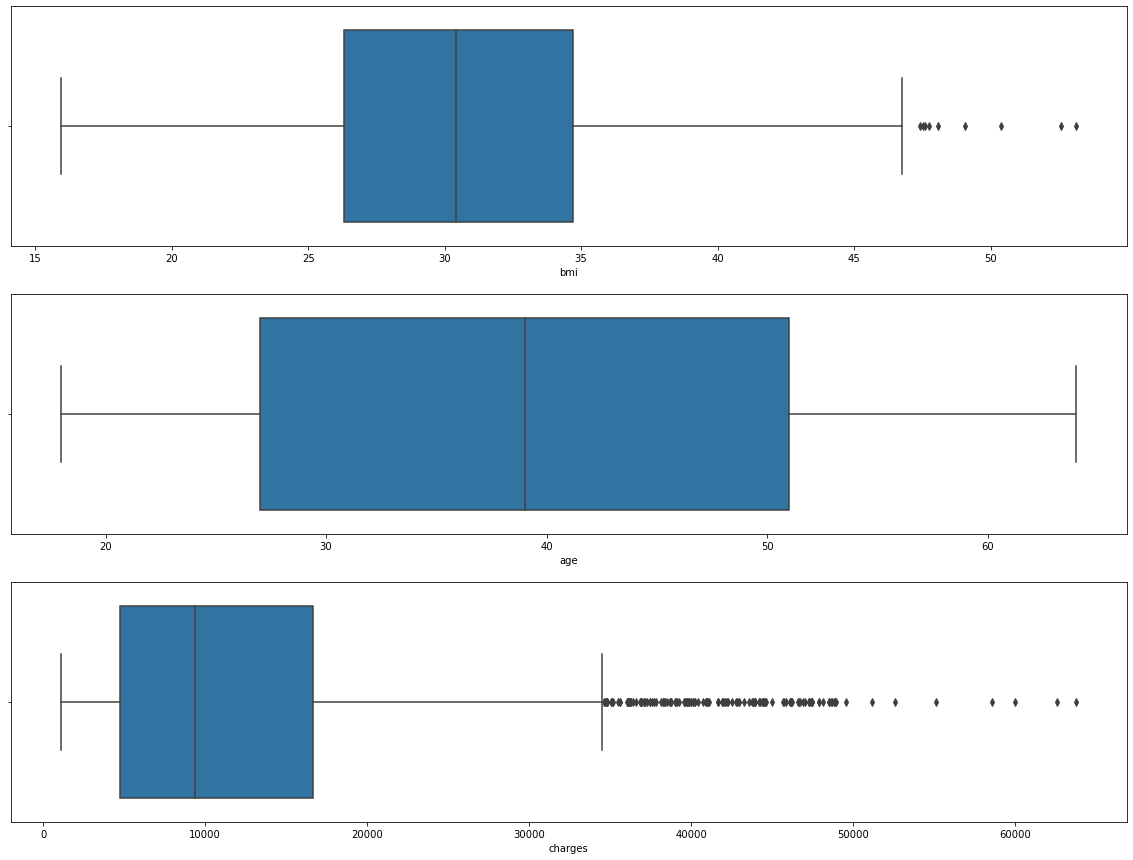

In [580]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi,)

plt.subplot(3,1,2)
sns.boxplot(x= data.age,)

plt.subplot(3,1,3)
sns.boxplot(x= data.charges,)

plt.show()

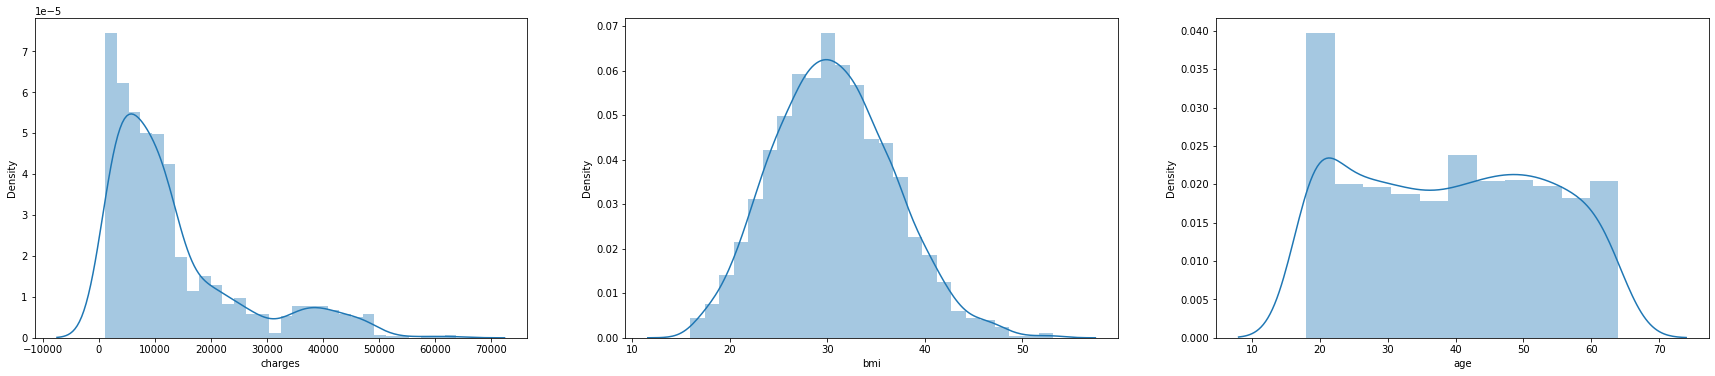

In [581]:
plt.figure(figsize= (30,20))
plt.subplot(3,3,1)
sns.distplot(data['charges'])
plt.xlabel('charges')

plt.subplot(3,3,2)
sns.distplot(data['bmi'])
plt.xlabel('bmi')

plt.subplot(3,3,3)
sns.distplot(data['age'])
plt.xlabel('age')

plt.show()

In [582]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data for charges is scewed while BMI follows normal distribution and age follows uniform distribution.  The mean age of your customers is 39 years old with the majority of your customers between 27 and 51.  The average BMI is 30.6 with the majority between 26.2 and 34.7.  The average amount of charges is 13.270 with the majority between 4,740 and 16,639

In [583]:
# Function to create barplots that indicate percentage for each category.
def ms_pc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

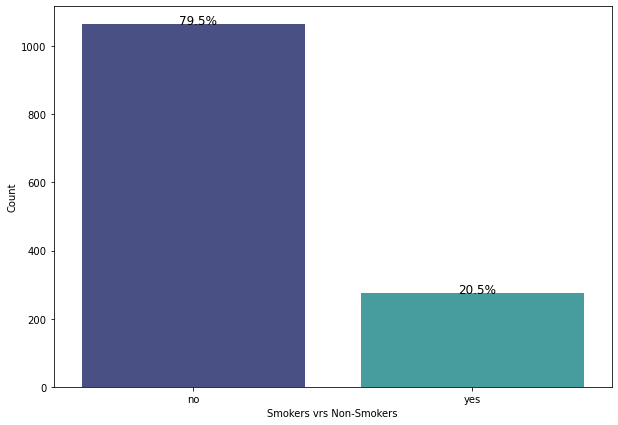

In [584]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data['smoker'], palette = 'mako')
plt.xlabel('Smokers vrs Non-Smokers')
plt.ylabel('Count')
ms_pc(ax,data['smoker'])

There is a higher percentage of non-smokers than smokers.

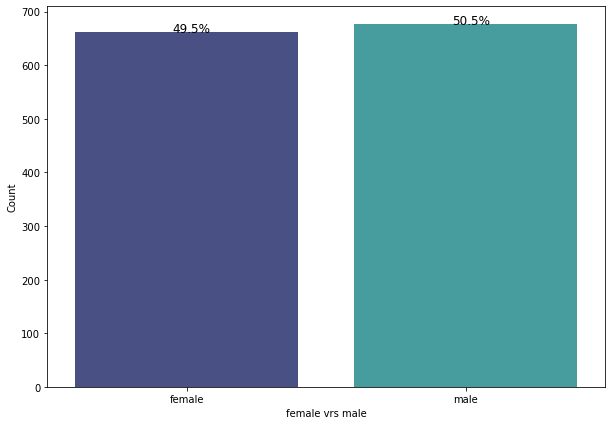

In [585]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data['sex'], palette = 'mako')
plt.xlabel('female vrs male')
plt.ylabel('Count')
ms_pc(ax,data['sex'])

Population genders are fairly equal

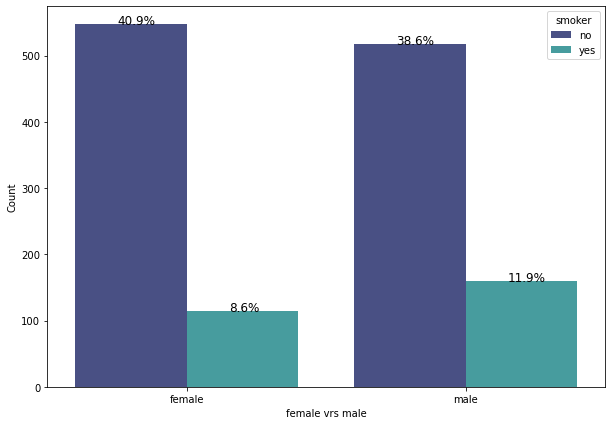

In [586]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data['sex'], hue=data['smoker'], palette = 'mako')
plt.xlabel('female vrs male')
plt.ylabel('Count')
ms_pc(ax,data['sex'])

Slightly more male than female smokers.  Slightly less male non-smokers than femal smokers


In [587]:
c_count = data.copy()
c_count=c_count[c_count['sex'] == 'female']


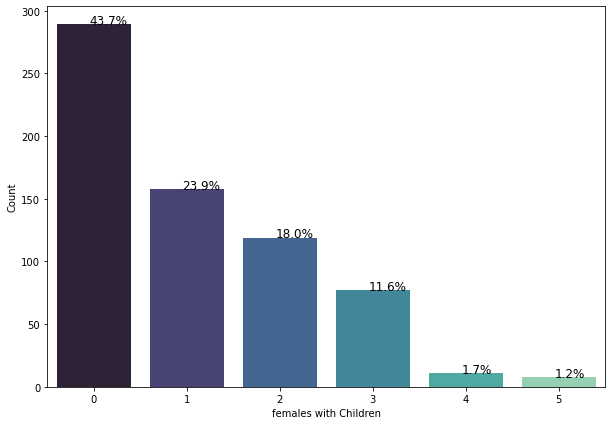

In [588]:
plt.figure(figsize=(10,7))
ax = sns.countplot(c_count['children'], palette = 'mako')
plt.xlabel('females with Children')
plt.ylabel('Count')
ms_pc(ax,c_count['children'])

Majority of females have two or less children

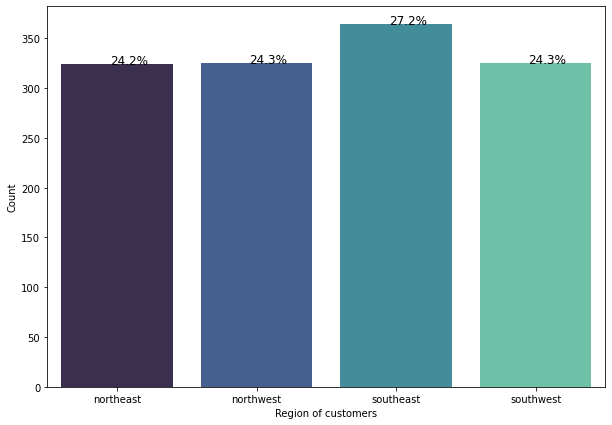

In [589]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data['region'], palette = 'mako')
plt.xlabel('Region of customers')
plt.ylabel('Count')
ms_pc(ax,data['region'])

samples accross the four regions are mostly even as well with the southwest having roughtly 3% higher population sample

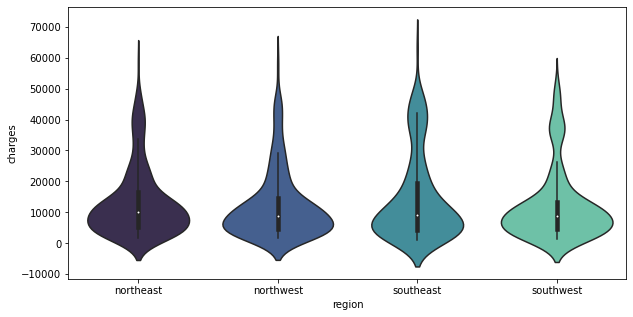

In [590]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.region, y=data['charges'], palette = 'mako')
plt.show()

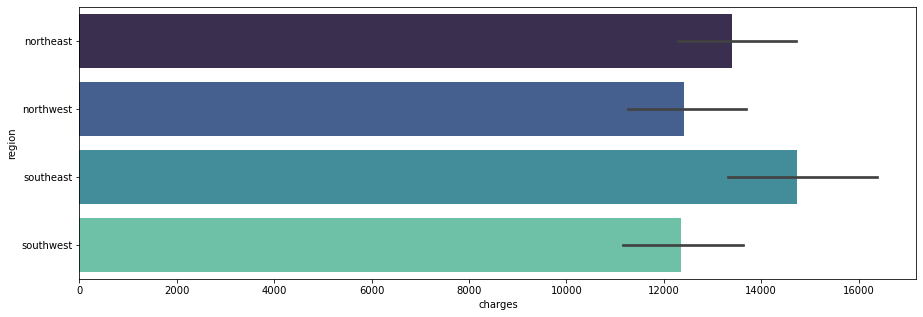

In [591]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='charges',y='region', palette = 'mako')
plt.show()

It appears that the southeast region has more higher end charges than the rest

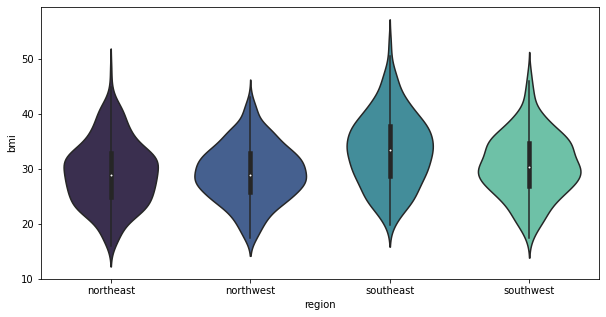

In [592]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.region, y=data['bmi'], palette = 'mako')
plt.show()

The southwest also has a greater percentage of higher BMI customers

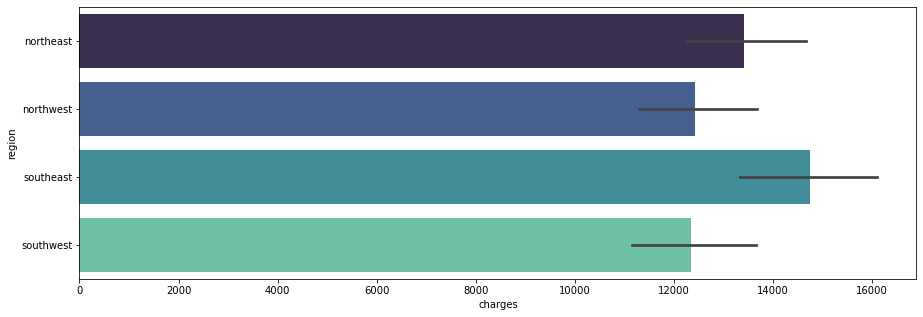

In [593]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='charges',y='region', palette = 'mako')
plt.show()

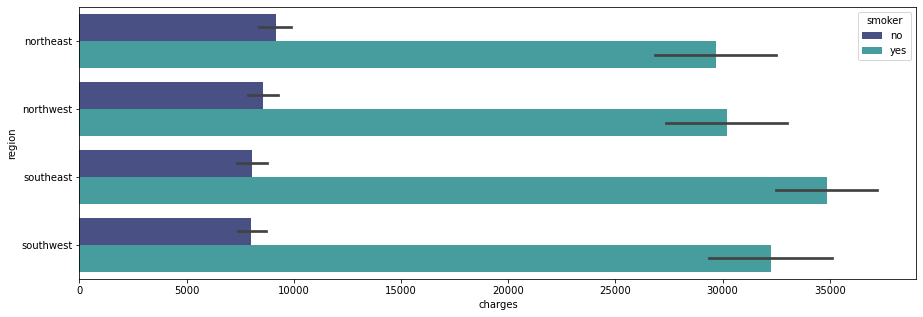

In [594]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='charges',y='region',hue='smoker', palette = 'mako')
plt.show()

The southwest also has a higher amount of smokers with higher charges.  

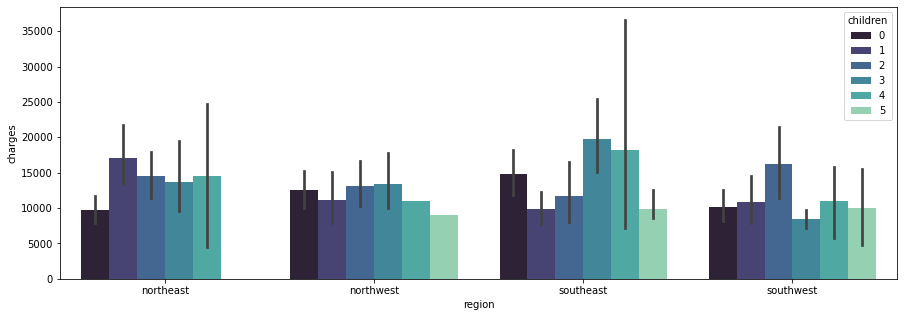

In [595]:
plt.figure(figsize=(15,5))
sns.barplot(data=female,x='region',y='charges',hue='children', palette = 'mako')
plt.show()

Higher outliers with woman with four children in the southwest. 

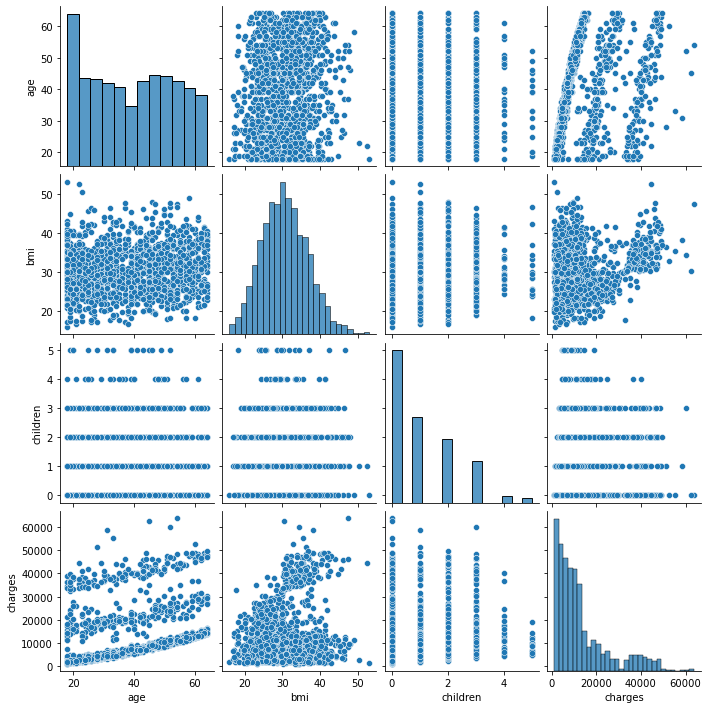

In [596]:
sns.pairplot(df);

<AxesSubplot:>

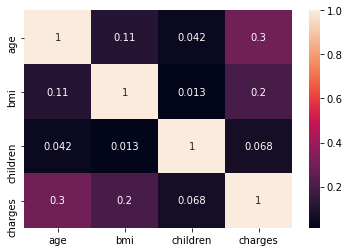

In [597]:
sns.heatmap(data.corr(), annot=True)

Highest correlation seems to be Age : Charges, followed by BMI : Charges but none of them appear to be very strong. 

# Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 

sm = claims made by smokers

ns = Claims made by non-smokers

Null Hypothosis

$H_0:$: sm = ns

Alternative Hypothosis

$H_a:$: sm > ms

In [598]:
sm=data.copy()

In [599]:
#first i like to filter the data
sm = data.copy()
sm = sm[sm['smoker'] == 'yes']
sm.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [600]:
ns = data.copy()
ns = ns[ns['smoker'] == 'no']
ns.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


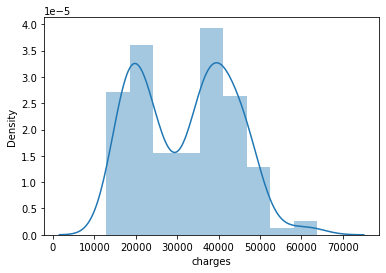

In [601]:
sns.distplot(sm['charges']);


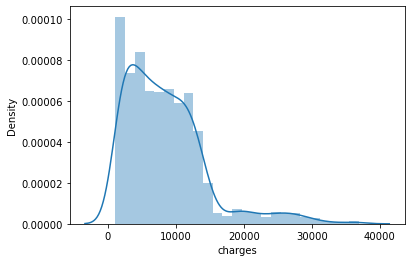

In [602]:
sns.distplot(ns['charges']);

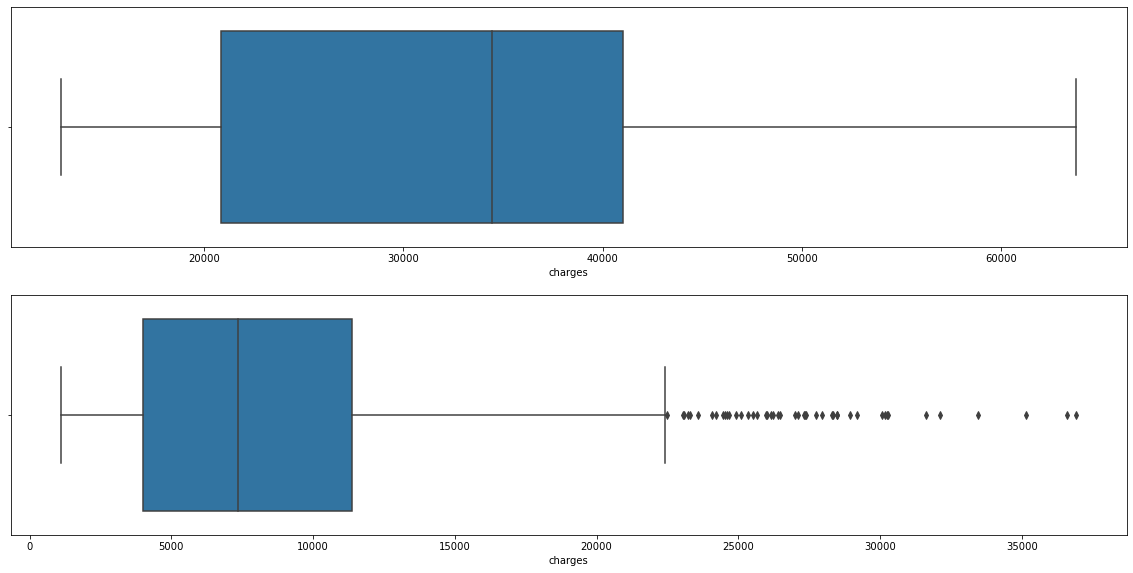

In [603]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= sm.charges,)

plt.subplot(3,1,2)
sns.boxplot(x= ns.charges,)
plt.show()

In [604]:
# find the sample means and sample standard deviations for the two samples
print('The mean charges of smokers is ' + str(sm['charges'].mean()))
print('The mean charges of non smokers is ' + str(ns['charges'].mean()))
print('The standard deviation of charges for smokers ' + str(round(sm['charges'].std(), 2)))
print('The standard deviation of charges for non smokers ' + str(round(ns['charges'].std(), 2)))

The mean charges of smokers is 32050.23183153285
The mean charges of non smokers is 8434.268297856199
The standard deviation of charges for smokers 11541.55
The standard deviation of charges for non smokers 5993.78


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the sample data is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

In [605]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind((sm['charges']), (ns['charges']), equal_var = False, alternative = 'greater')

alpha_value = .05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print('The p-value is ', p_value)
if p_value < alpha_value: 
    print('reject null hypothesis ')
    print('there is a difference between charges of smokers and non-smokers')
else:
    print('fail to reject the null hyp' )
    print('there is no difference between charges of smokers and non-smokers')

Level of significance: 0.05
The p-value is  2.94473222335849e-103
reject null hypothesis 
there is a difference between charges of smokers and non-smokers


# Prove (or disprove) with statistical evidence that the BMI of females is different from that of males

𝜇1 is BMI of the males
𝜇2 is the BMI of the famles

We will test the null hypothesis

$H_0:$:𝜇1=𝜇2 

against the alternate hypothesis

$H_a:$:𝜇1≠𝜇2

In [606]:
male = data.copy()
male = male[male['sex'] == 'male']
male.describe()


,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [607]:
female = data.copy()
female = female[female['sex'] == 'female']
female.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


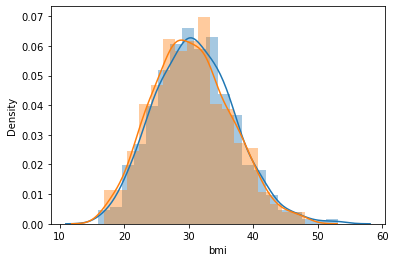

In [608]:
sns.distplot(male['bmi'])
sns.distplot(female['bmi']);


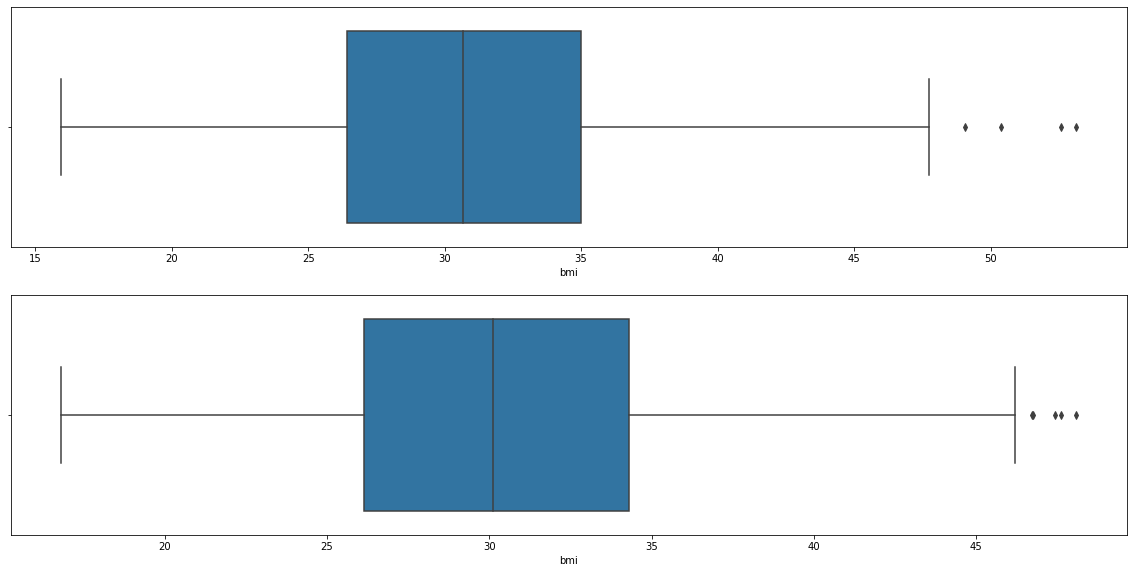

In [609]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= male.bmi,)

plt.subplot(3,1,2)
sns.boxplot(x= female.bmi,)
plt.show()

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the sample data is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

In [610]:
print('The mean BMI for males is ' + str(male['bmi'].mean()))
print('The mean BMI for females is ' + str(female['bmi'].mean()))
print('The standard deviation of BMI for males is ' + str(round(male['bmi'].std(), 2)))
print('The standard deviation of BMI for females is ' + str(round(female['bmi'].std(), 2)))

The mean BMI for males is 30.943128698224832
The mean BMI for females is 30.377749244713023
The standard deviation of BMI for males is 6.14
The standard deviation of BMI for females is 6.05


In [611]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(male['bmi'], female['bmi'], equal_var = False, alternative = 'two-sided')
                               
alpha_value = .05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print('The p-value is ', p_value)
if p_value < alpha_value:
    print('reject null hypothesis ')
    print('There is evidence that there is a significant difference in BMI of male and female')
else:
    print('fail to reject the null hypothesis' )
    print('No evidence that there is a significant difference in BMI of male and female')

Level of significance: 0.05
The p-value is  0.08992430667834876
fail to reject the null hypothesis
No evidence that there is a significant difference in BMI of male and female


the P-value is greater that 0.05 so we have failed to reject the null hypothosis

## Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

$H_0:$:  Proportion of smokers is the same accross different regions.

against the alternate hypothesis

$H_a:$:  Proportion of smokers is the not the same accross different regions..

As the hint states, I've created a cross tab of the catagories smokers and region.

In [612]:
df_2 = pd.crosstab(df['smoker'], df['region'])

In [613]:
df_2.head()

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the sample data is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

In [614]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df_2)
print('The p-value is ' + str(p_value))
if p_value < 0.05: 
    print('reject null hypothesis ')
    print('There is evidence that there is a significant difference in the proportions of smokers across regions')
else:
    print('fail to reject the null hypothesis' )
    print('There is no evidence that there is a significant difference in the proportions of smokers across regions')


The p-value is 0.06171954839170547
fail to reject the null hypothesis
There is no evidence that there is a significant difference in the proportions of smokers across regions


# Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence

Let  𝜇0,𝜇1,𝜇2  be the means of BMI of woman respectively with the number of children they have had.

We will test the null hypothesis

$H_0:$:𝜇0=𝜇1=𝜇2 
against the alternative hypothesis

$H_a:$:  𝜇0,𝜇1,𝜇2 are not the same

In [615]:

child= female.copy()
child=child.drop(['age', 'sex', 'smoker', 'region', 'charges'], axis=1)

In [616]:
#removing all entries with more than 2 children to satisfy the given question.
child_2 = child[child['children'] <= 2]
  
child_2.head()

,bmi,children
0,27.90,0
5,25.74,0
6,33.44,1
9,25.84,0
11,26.29,0


In [617]:
child_2.describe()

,bmi,children
count,566.000000,566.000000
mean,30.335910,0.699647
std,6.055825,0.794828
min,16.815000,0.000000
25%,26.053750,0.000000
50%,29.972500,0.000000
75%,34.437500,1.000000
max,48.070000,2.000000


children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64


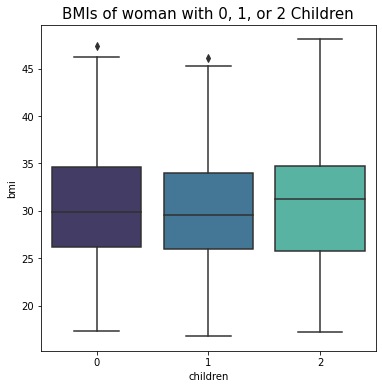

In [618]:
# mean BMI concerning children
print(child_2.groupby("children")["bmi"].mean())

# boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "children", y = 'bmi' , data = child_2, palette = 'mako')
a.set_title("BMIs of woman with 0, 1, or 2 Children", fontsize=15)
plt.show()

## Shapiro-Wilk’s test

### We will test the null hypothesis

𝐻0:  BMI with children follows a normal distribution against

against the alternative hypothesis

𝐻𝑎:  BMI with children does not follow a normal distribution

In [619]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(child_2['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010864038951694965


Since p-value of the test is below .05, we  reject the null hypothesis that the response follows the normal distribution.

## Levene’s test
We will test the null hypothesis

𝐻0 : All the sample variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [620]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( child_2['bmi'][child_2['children']==0], 
                                   child_2['bmi'][child_2['children']==1], 
                                   child_2['bmi'][child_2['children']==2])
# find the p-value
print('The p-value is', p_value)
if p_value < 0.05: 
    print('reject null hypothesis ')

else:
    print('fail to reject the null hypothesis' )


The p-value is 0.3899432394522804
fail to reject the null hypothesis


Since the p-value is above 0.05, we fail to reject the null hypothesis of homogeneity of variances.

In [621]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway( child_2['bmi'][child_2['children']==0], 
                                   child_2['bmi'][child_2['children']==1], 
                                   child_2['bmi'][child_2['children']==2])
print('The p-value is ' + str(p_value))
      

The p-value is 0.7158579926754841


Since the p-value is above 0.05, we fail to reject the null hypothesis of woman who've had zero, one, or two children have the same BMI

Conclusions:  We have proved with statistical evidence that the claims of both smokers and non-smokers in the population sample are not significantly different.  We have proved with statistical evidence that BMI between males and females in the population sample are not significantly different.  We have proved that there is no statistical evidence that the proportion of smokers does not significanly differ across the four regions.  And lastly we have proved that there is no statistical evidence of a diffrence in BMI of females that have had zero, one, or two children.  